## Uppgift 1
### Landstatistik

Ni får ett land tilldelat till er grupp. Börja med att anonymisera kolumnen med idrottarnas namn med hashfunktionen SHA-256.

Undersök därefter hur det gått för landet i OS genom tiderna.

Visualisera exempelvis:

- de sporter landet fått flest medaljer i


In [47]:
import pandas as pd
import hashlib as hl

anon_df = pd.read_csv("athlete_events.csv")
anon_df["Name"] = anon_df["Name"].apply(lambda name: hl.sha256(name.encode()).hexdigest())

anon_df.head(3)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,3a4eef48434c66b3f14ab0221f6762d0ef7c6135ab2790...,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,a6430cc6630934275dc6283f7e97e9625e6587cdddec7a...,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,9c198b205332c2c8e1542e0f9534b9e270780a41d978ec...,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN


In [48]:
df_gbr = anon_df[anon_df["NOC"] == "GBR"]

df_gbr.head(3)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
785,453,068d40aa50057f323cccc9b76161d21e3014635a0bd3b4...,M,24.0,NaN,NaN,Great Britain,GBR,1928 Summer,1928,Summer,Amsterdam,Water Polo,Water Polo Men's Water Polo,NaN
786,453,068d40aa50057f323cccc9b76161d21e3014635a0bd3b4...,M,32.0,NaN,NaN,Great Britain,GBR,1936 Summer,1936,Summer,Berlin,Water Polo,Water Polo Men's Water Polo,NaN
888,509,ad4b525a32fc54f54d6221545f27ff31d81200fa3bc741...,M,17.0,175.0,64.0,Great Britain,GBR,1976 Summer,1976,Summer,Montreal,Swimming,Swimming Men's 100 metres Backstroke,NaN


In [49]:
sport_medals = df_gbr.groupby("Sport", observed=True)[["Medal"]].count() 
top_10_sports = sport_medals.sort_values(by="Medal", ascending=False).head(10)

top_10_sports 

,Medal
Sport,
Athletics,338
Rowing,270
Cycling,182
Hockey,163
Sailing,143
Swimming,127
Shooting,99
Equestrianism,83
Tennis,67


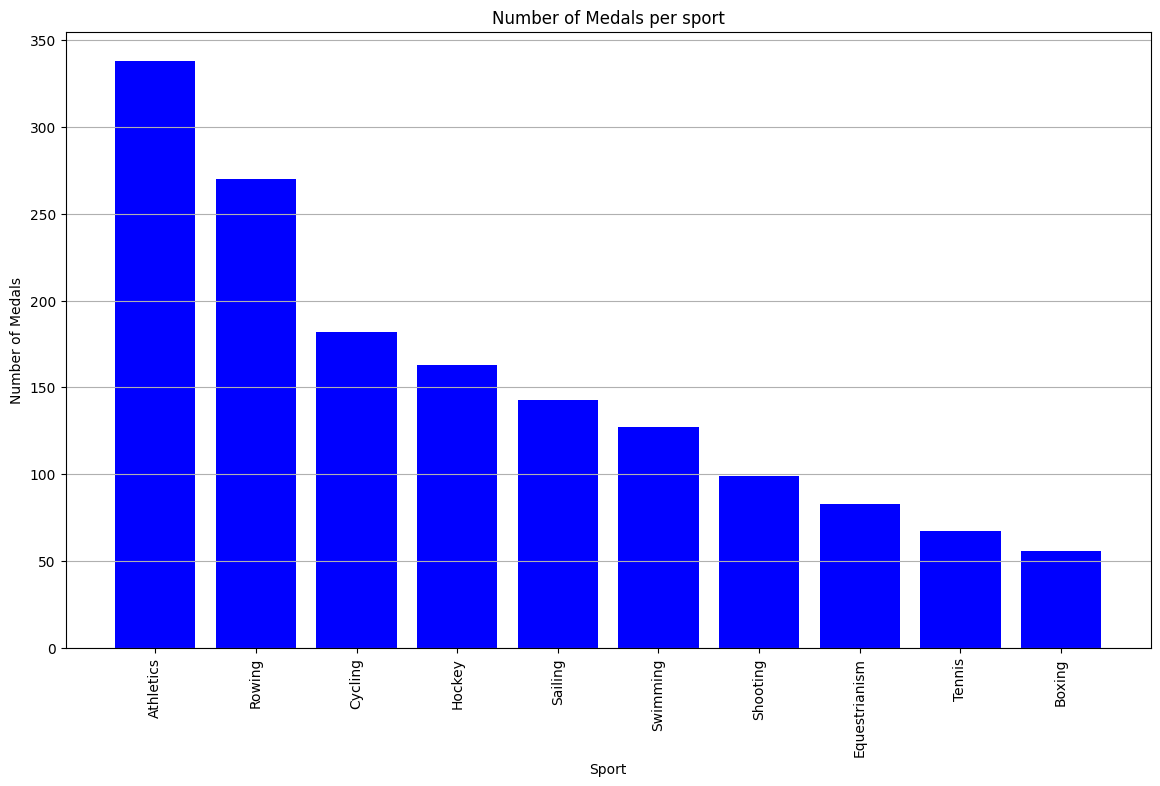

In [50]:
import matplotlib.pyplot as plt

sport_medals = df_gbr.groupby("Sport")["Medal"].count().sort_values(ascending=False)

plt.figure(figsize=(14, 8))
plt.bar(top_10_sports.index, top_10_sports["Medal"], color="blue")
plt.xticks(rotation=90)
plt.title("Number of Medals per sport")
plt.ylabel("Number of Medals")
plt.xlabel("Sport")
plt.grid(axis="y")
plt.show()


- antal medaljer per OS


In [51]:
os_medals = df_gbr.groupby("Games", observed=True)[["Medal"]].count()

os_medals.head(10)

,Medal
Games,
1896 Summer,9
1900 Summer,108
1904 Summer,2
1906 Summer,39
1908 Summer,368
1912 Summer,170
1920 Summer,111
1924 Summer,64
1924 Winter,31


In [52]:
os_type_medals = df_gbr.groupby(['Games', 'Medal'], observed=True).size().unstack(fill_value=0) # https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html # https://stackoverflow.com/questions/72495322/faster-alternative-to-groupby-unstack-then-fillna # https://www.w3resource.com/pandas/dataframe/dataframe-unstack.php

os_type_medals.head(10)

Medal,Bronze,Gold,Silver
Games,,,
1896 Summer,3,3,3
1900 Summer,15,59,34
1904 Summer,0,1,1
1906 Summer,8,9,22
1908 Summer,90,147,131
1912 Summer,59,47,64
1920 Summer,17,52,42
1924 Summer,19,15,30
1924 Winter,11,16,4


<Figure size 1600x800 with 0 Axes>

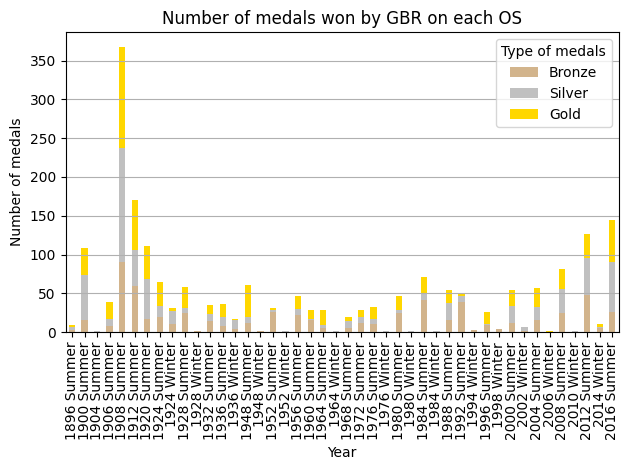

In [53]:
plt.figure(figsize=(16, 8))
os_type_medals.plot(kind="bar", stacked=True, color=["tan","silver","gold"]) # https://www.weirdgeek.com/2018/11/plotting-stacked-histogram/ # https://i.sstatic.net/lFZum.png 
plt.xticks(rotation=90)
plt.title("Number of medals won by GBR on each OS")
plt.ylabel("Number of medals")
plt.xlabel("Year")
plt.grid(axis="y")
plt.legend(title="Type of medals", labels=["Bronze", "Silver", "Gold"])
plt.tight_layout()
plt.show()

- histogram över åldrar

Oldest participant = 84.0
Youngest participant = 11.0
Rounding the age difference to divide ages in group aka bins = 8.0


<Axes: title={'center': 'OS-GBR: Participants Ages'}, xlabel='Age Bracket', ylabel='Number of individuals'>

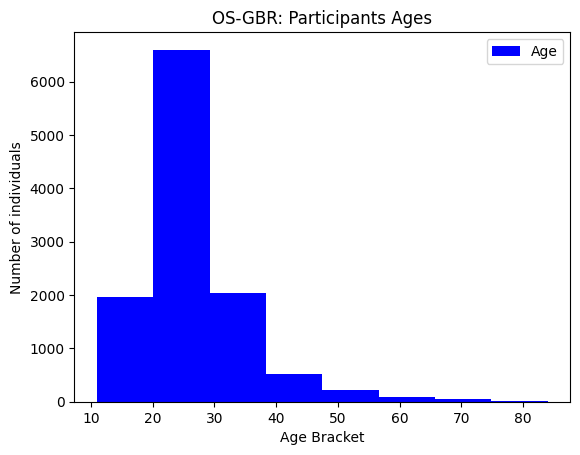

In [ ]:
print(f"Oldest participant =", df_gbr["Age"].max())
print(f"Youngest participant =", df_gbr["Age"].min())
print(f"Rounding the age difference to divide ages in group aka bins =", round(84/11,0))
print("Each histogram represent groups of 9.125 years, example 11-20, 21-30 and so on")

df_gbr.plot(column = "Age", kind = "hist", xlabel = "Age Bracket", ylabel = "Number of individuals", bins=8, color="blue", title="OS-GBR: Participants Ages") # https://www.geeksforgeeks.org/pandas-dataframe-hist/ 

## Källa
### Många uppgifter löstes med inspiration av koden från repo nedan
https://github.com/pr0fez/AI24-Databehandling 
